In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('telco_churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [13]:
df[(df.TotalCharges!=' ')].shape

(7032, 20)

In [16]:
df1=df[(df.TotalCharges!=' ')]
df1.shape

(7032, 20)

In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [34]:
df1['TotalCharges']=pd.to_numeric(df1.TotalCharges)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8444\3081713981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges']=pd.to_numeric(df1.TotalCharges)


In [35]:
df1['TotalCharges'].dtypes

dtype('float64')

Text(0, 0.5, 'NO of customers')

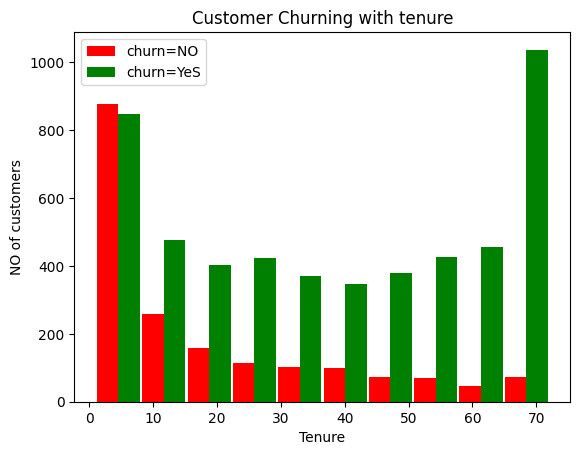

In [36]:
churn_yes_tenure=df1[df1.Churn=='Yes'].tenure
churn_no_tenure=df1[df1.Churn=='No'].tenure

plt.hist([churn_yes_tenure,churn_no_tenure],rwidth=0.95,color=['red','green'],label=['churn=NO','churn=YeS'])
plt.legend()
plt.title('Customer Churning with tenure')
plt.xlabel('Tenure')
plt.ylabel('NO of customers')

Text(0, 0.5, 'NO of customers')

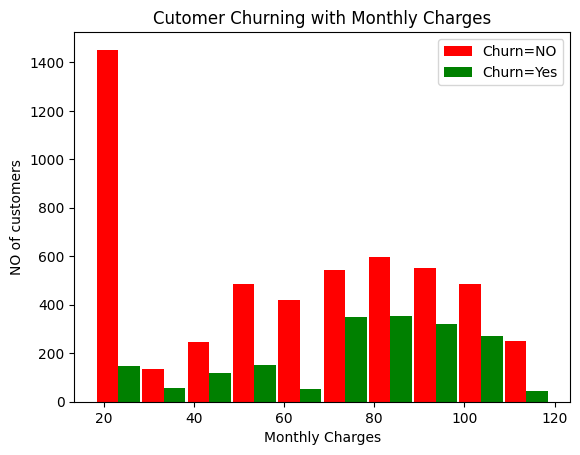

In [37]:
churn_yes_monthlyCharges=df1[df1.Churn=='Yes'].MonthlyCharges
churn_no_monthlyCharges=df1[df1.Churn=='No'].MonthlyCharges

plt.hist([churn_no_monthlyCharges,churn_yes_monthlyCharges],rwidth=0.95,color=['red','green'],label=['Churn=NO','Churn=Yes'])
plt.legend() 
plt.title('Cutomer Churning with Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('NO of customers')

In [38]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [39]:
def print_unique_val (df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [40]:
print_unique_val(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [41]:
df1.replace('No phone service','No',inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8444\628100714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [42]:
df1.replace('No internet service','No',inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8444\3939576099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [43]:
print_unique_val(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [45]:
for column in df1:
    if df1[column].dtypes=='object':
        unique_val=df1[column].unique()
        if 'Yes' in unique_val or 'No' in unique_val:
            df1.replace({'Yes':1,'No':0},inplace=True)
            
    
        
        
    

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8444\1386889625.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'Yes':1,'No':0},inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8444\1386889625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'Yes':1,'No':0},inplace=True)


In [46]:
print_unique_val(df1)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 0]
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [47]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [48]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

array([0, 1], dtype=int64)

In [49]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [50]:
df2.replace({'Female':0,'Male':1},inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8444\970341769.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({'Female':0,'Male':1},inplace=True)


In [51]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,False,True,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,False,True,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False


In [52]:
df2 = df2.applymap(lambda x: 1 if x == True else (0 if x == False else x))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8444\590482000.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: 1 if x == True else (0 if x == False else x))


In [53]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [54]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
df2[col_to_scale]=sc.fit_transform(df2[col_to_scale])

In [55]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [64]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [65]:
X_train.shape

(5625, 26)

In [66]:
y_train.shape

(5625,)

In [57]:
import tensorflow as tf
from tensorflow import keras 

In [67]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.4761 - accuracy: 0.7618
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.7927
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8030
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8057
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8046
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8089
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8092
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8100
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8096
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4004 - accura

In [68]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7647


[0.4951411187648773, 0.764747679233551]

In [70]:
y_pred=model.predict(X_test)
y_pred[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.3391595 ],
       [0.4873065 ],
       [0.00827252],
       [0.8747072 ],
       [0.4199242 ]], dtype=float32)

In [71]:
prediction=[]

for i in y_pred:
    if i>=0.5:
        prediction.append(1)
    else:
        prediction.append(0)
        

In [73]:
prediction[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [74]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [76]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       999
           1       0.61      0.54      0.57       408

    accuracy                           0.76      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

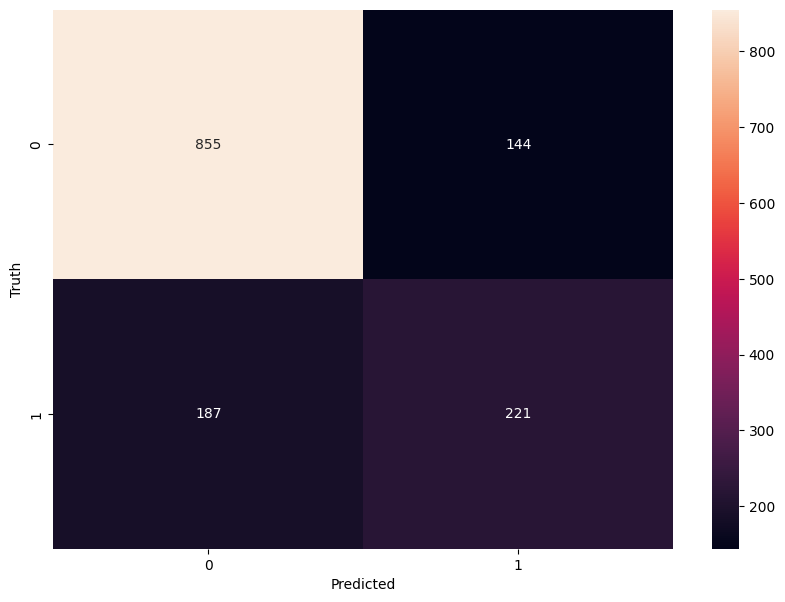

In [77]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=prediction)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')